In [1]:
from route_shape_process_scripts import *
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import numpy as np
import time

In [3]:
full_routes_gtfs = pd.read_csv("gtfs_routes_2018-08-15_2018-12-12.csv")
full_shapes_gtfs = pd.read_csv("gtfs_shapes_2018-08-15_2018-12-12.csv")
full_trips_gtfs = pd.read_csv("gtfs_trips_2018-08-15_2018-12-12.csv")
full_trip_stop_schedule = pd.read_csv("gtfs_2018-08-15_2018-12-12.csv")

/Users/benjaminmalnor/anaconda2/envs/geopy36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
route_name = 'E Line'
get_select_routeid_name(full_routes_gtfs, [route_name])[2]

{'E Line': 102615}

In [24]:
route_desc = get_select_routeid_name(full_routes_gtfs, [route_name])[0]['route_desc'].iloc[0]

# input dict

In [11]:
input_dict = {'route_id':102615}
input_dict['shape_id'] = 11675003

# import

In [13]:
file_path = "route_{}_shape_{}_stopsonly_2018-08-15_2018-12-11.csv".format(
                                       input_dict['route_id'], input_dict['shape_id'])
unpacked_positions_full_w_start = pd.read_csv(file_path)

In [14]:
stop_name_dict = pd.Series(data=unpacked_positions_full_w_start.stop_name.values,
          index=[int(x) for x in unpacked_positions_full_w_start.shape_dist_traveled.values]).to_dict()

# define peak and offpeak hours

In [15]:
morning_hours = [7,8,9]
afternoon_hours = [15,16,17,18]
peak_hours = morning_hours+afternoon_hours
all_hours = list(unpacked_positions_full_w_start.hour.unique())
offpeak_hours = [hours for hours in all_hours if hours not in peak_hours]

# plot number of records per shape_dist_traveled

<BarContainer object of 38 artists>

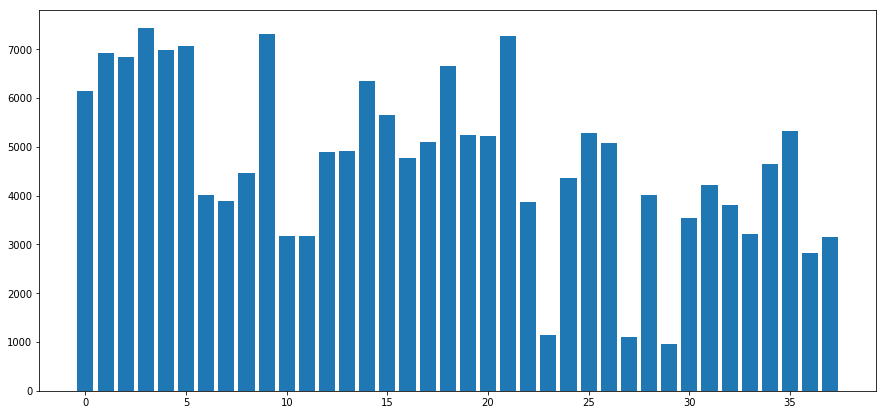

In [16]:
fig, ax = plt.subplots(figsize=(15,7))
x_labels = [stop_name_dict[int(x)] for x in (unpacked_positions_full_w_start.groupby('shape_dist_traveled')\
        .agg({'month_day_trip_veh':'nunique'})\
        .index.values)]
x_pos = np.arange(len(x_labels))
bar_h = unpacked_positions_full_w_start.groupby('shape_dist_traveled')\
        .agg({'month_day_trip_veh':'nunique'})\
        ['month_day_trip_veh'].values

#plt.xticks(x_pos,x_labels, rotation='vertical', visible=True)
#plt.subplots_adjust(bottom=0.15)
ax.bar(x_pos, bar_h)

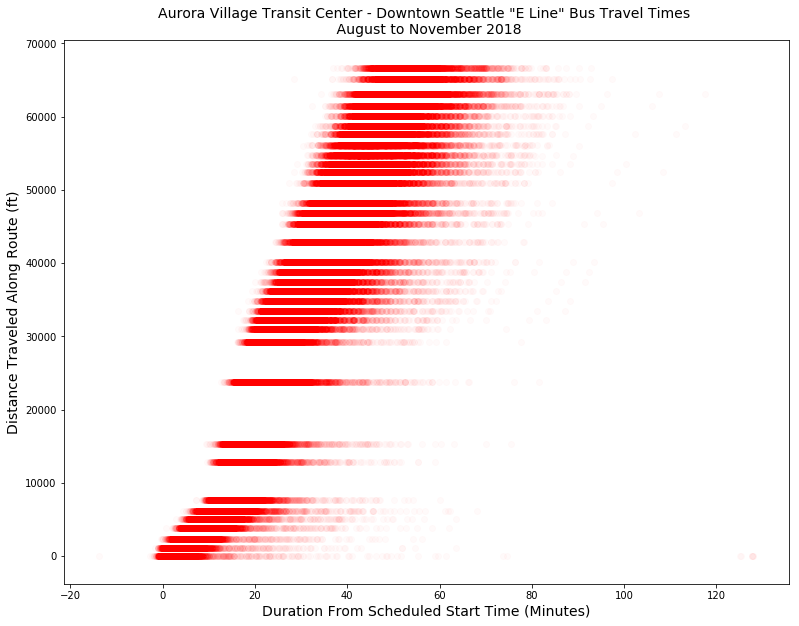

In [25]:
fig, ax = plt.subplots(figsize=(13,10))
grouped = unpacked_positions_full_w_start.groupby('month_day_trip_veh')
for name, group in grouped:
    x = group['time_from_scheduled_start'].values
    y = group['shape_dist_traveled'].values
    ax.scatter(x, y, c='red', alpha=0.02)

ax.set_xlabel("Duration From Scheduled Start Time (Minutes)", fontsize=14)
ax.set_ylabel("Distance Traveled Along Route (ft)", fontsize=14)
title_str = ("{} \"{}\" Bus Travel Times \n August to November 2018".format(route_desc, route_name))
_ = ax.set_title(title_str, fontsize=14)

In [26]:
grouped = unpacked_positions_full_w_start.groupby('month_day_trip_veh')

In [27]:
peak_positions_full_w_start = unpacked_positions_full_w_start[unpacked_positions_full_w_start.hour.isin(peak_hours)]
offpeak_positions_full_w_start = unpacked_positions_full_w_start[unpacked_positions_full_w_start.hour.isin(offpeak_hours)]
peak_grouped = peak_positions_full_w_start.groupby('month_day_trip_veh')
offpeak_grouped = offpeak_positions_full_w_start.groupby('month_day_trip_veh')
print("peak trips {}, offpeak trips = {}".format(peak_grouped.ngroups, offpeak_grouped.ngroups))

peak trips 5002, offpeak trips = 4547


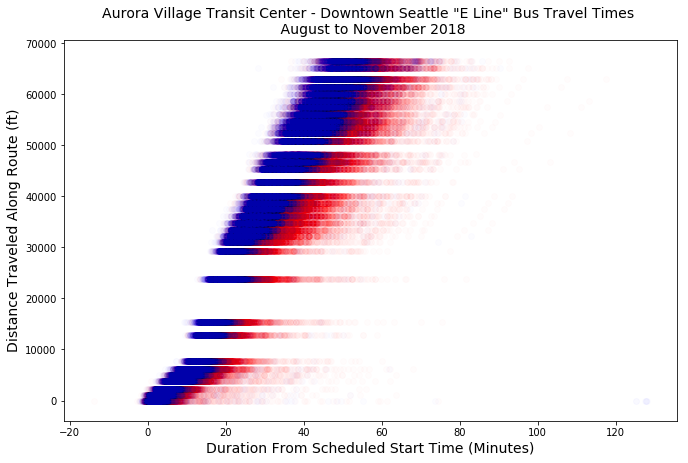

In [28]:
fig, ax = plt.subplots(figsize=(11,7))
for name, peak_group in peak_grouped:
    x_peak = peak_group['time_from_scheduled_start'].values
    y_peak = peak_group['shape_dist_traveled'].values
    ax.scatter(x_peak, y_peak,label='peak',c='red', alpha=0.01)
for name, off_group in offpeak_grouped:
    x_off = off_group['time_from_scheduled_start'].values
    y_off = off_group['shape_dist_traveled'].values
    ax.scatter(x_off, y_off,label='offpeak',c='blue', alpha=0.01)
#ax.legend()
ax.set_xlabel("Duration From Scheduled Start Time (Minutes)", fontsize=14)
ax.set_ylabel("Distance Traveled Along Route (ft)", fontsize=14)
title_str = ("{} \"{}\" Bus Travel Times \n August to November 2018".format(route_desc, route_name))
_ = ax.set_title(title_str, fontsize=14)

# priorities
- 7 (from Rainier & S Henderson to 4th and Jackson), 
- 7 (from Rainier and S Henderson to Rainier and Jackson)
- 7 (from Rainier and Jackson to 4th and Jackson)


In [29]:
stop_name_dict = pd.Series(data=unpacked_positions_full_w_start.stop_name.values,
          index=unpacked_positions_full_w_start.shape_pt_sequence.values).to_dict()

In [30]:
stop_name_dict

{1: 'Prefontaine Pl S & Yesler Way',
 11: '3rd Ave & Columbia St',
 16: '3rd Ave & Seneca St',
 21: '3rd Ave & Pike St',
 34: '3rd Ave & Virginia St',
 38: '3rd Ave & Bell St',
 49: 'Aurora Ave N & Denny Way',
 105: 'Aurora Ave N & Galer St',
 130: 'Aurora Ave N & Lynn St',
 170: 'Aurora Ave N & N 46th St',
 206: 'Woodland Pl N & N 65th St',
 221: 'Linden Ave N & N 72nd St',
 236: 'Aurora Ave N & N 76th St',
 242: 'Aurora Ave N & N 80th St',
 248: 'Aurora Ave N & N 85th St',
 259: 'Aurora Ave N & N 91st St',
 267: 'Aurora Ave N & N 95th St',
 274: 'Aurora Ave N & N 100th St',
 280: 'Aurora Ave N & N Northgate Way',
 288: 'Aurora Ave N & N 115th St',
 293: 'Aurora Ave N & N 125th St',
 301: 'Aurora Ave N & N 130th St',
 305: 'Aurora Ave N & N 135th St',
 316: 'Aurora Ave N & N 145th St',
 325: 'Aurora Ave N & N 152nd St',
 327: 'Aurora Ave N & N 155th St',
 331: 'Aurora Ave N & N 160th St',
 337: 'Aurora Ave N & N 165th St',
 344: 'Aurora Ave N & N 170th St',
 352: 'Aurora Ave N & N 175

In [31]:
morning_hour_edge_trips = unpacked_positions_full_w_start[unpacked_positions_full_w_start.hour.isin(morning_hours)]
afternoon_hour_edge_trips = unpacked_positions_full_w_start[unpacked_positions_full_w_start.hour.isin(afternoon_hours)]
peak_hour_edge_trips = unpacked_positions_full_w_start[unpacked_positions_full_w_start.hour.isin(peak_hours)]
off_peak_hour_edge_trips = unpacked_positions_full_w_start[unpacked_positions_full_w_start.hour.isin(offpeak_hours)]
morning_pivot_time_from_sched = morning_hour_edge_trips.pivot_table(index='month_day_trip_veh',
                                                              columns='shape_pt_sequence',
                                                              values='time_from_scheduled_start')

afternoon_pivot_time_from_sched = afternoon_hour_edge_trips.pivot_table(index='month_day_trip_veh',
                                                              columns='shape_pt_sequence',
                                                              values='time_from_scheduled_start')
peak_pivot_time_from_sched = peak_hour_edge_trips.pivot_table(index='month_day_trip_veh',
                                                              columns='shape_pt_sequence',
                                                              values='time_from_scheduled_start')
offpeak_pivot_time_from_sched = off_peak_hour_edge_trips.pivot_table(index='month_day_trip_veh',
                                                              columns='shape_pt_sequence',
                                                              values='time_from_scheduled_start')

In [32]:
morning_pivot_time_from_sched.rename(columns=stop_name_dict, inplace=True)
afternoon_pivot_time_from_sched.rename(columns=stop_name_dict, inplace=True)
peak_pivot_time_from_sched.rename(columns=stop_name_dict, inplace=True)
offpeak_pivot_time_from_sched.rename(columns=stop_name_dict, inplace=True)
afternoon_pivot_time_from_sched.head(10)

shape_pt_sequence,Prefontaine Pl S & Yesler Way,3rd Ave & Columbia St,3rd Ave & Seneca St,3rd Ave & Pike St,3rd Ave & Virginia St,3rd Ave & Bell St,Aurora Ave N & Denny Way,Aurora Ave N & Galer St,Aurora Ave N & Lynn St,Aurora Ave N & N 46th St,...,Aurora Ave N & N 155th St,Aurora Ave N & N 160th St,Aurora Ave N & N 165th St,Aurora Ave N & N 170th St,Aurora Ave N & N 175th St,Aurora Ave N & N 180th St,Aurora Ave N & N 185th St,Aurora Ave N & N 192nd St,Aurora Ave N & N 200th St,Aurora Village Transit Center - Bay 3
month_day_trip_veh,,,,,,,,,,,,,,,,,,,,,
2018_10_10_40955465_6110,8.766667,11.766667,13.266667,17.766667,19.266667,22.283333,25.266667,NaN,28.266667,34.266667,...,61.466667,62.466667,64.266667,NaN,65.466667,67.266667,68.766667,NaN,73.266667,NaN
2018_10_10_40955468_6092,-2.766667,1.716667,3.216667,6.216667,7.716667,9.216667,12.216667,15.216667,16.716667,21.216667,...,49.016667,NaN,NaN,51.216667,NaN,NaN,54.233333,NaN,57.216667,58.800000
2018_10_10_40955469_6088,5.583333,7.083333,10.100000,14.583333,16.083333,19.083333,22.083333,NaN,26.583333,30.066667,...,NaN,55.083333,NaN,NaN,NaN,58.450000,NaN,61.083333,NaN,NaN
2018_10_10_40955470_6049,0.150000,1.650000,3.150000,6.150000,7.650000,10.650000,12.166667,NaN,15.166667,19.650000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018_10_10_40955494_6084,NaN,NaN,NaN,NaN,10.116667,13.116667,NaN,NaN,NaN,NaN,...,44.066667,NaN,46.500000,47.616667,48.150000,50.616667,NaN,52.116667,NaN,55.433333
2018_10_10_40955496_6212,3.650000,6.633333,8.150000,11.150000,12.633333,15.650000,18.650000,21.650000,23.150000,29.150000,...,55.233333,57.350000,58.300000,NaN,NaN,61.483333,63.650000,65.150000,68.150000,NaN
2018_10_10_40955504_6055,0.083333,2.600000,4.100000,7.100000,8.616667,10.100000,14.600000,NaN,17.616667,22.116667,...,43.100000,NaN,NaN,44.283333,NaN,NaN,47.600000,NaN,53.600000,NaN
2018_10_10_40955512_6212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.150000,NaN,42.150000,43.450000,44.250000,NaN,47.650000,49.150000,NaN,52.416667
2018_10_10_40955514_6067,NaN,NaN,9.466667,12.483333,13.983333,16.983333,19.966667,22.983333,24.466667,30.483333,...,55.366667,56.050000,NaN,57.483333,NaN,NaN,60.483333,61.983333,63.483333,NaN


In [43]:
def plot_histograms(peak_pivot_df, offpeak_pivot_df, shape_id,stop_1, stop_2, vline_ymax):
    '''
    '''
    fig, ax = plt.subplots(figsize=(13,8))

    ax.hist((offpeak_pivot_df.loc[:, 
                         stop_2]
            -
            offpeak_pivot_df.loc[:, 
                         stop_1]).dropna(),
                bins=20,
                   color='blue',
            label='off-peak hours',
             alpha=0.5,
           density=True)
    offpeak_mean = (offpeak_pivot_df.loc[:, 
                         stop_2]
            -
            offpeak_pivot_df.loc[:, 
                         stop_1]).dropna().values.mean()

    offpeak_std = (offpeak_pivot_df.loc[:, 
                         stop_2]
            -
            offpeak_pivot_df.loc[:, 
                         stop_1]).dropna().values.std()

    offpeak_mean_plus_std = offpeak_mean+offpeak_std
    offpeak_mean_minus_std = offpeak_mean-offpeak_std
    
    offpeak_count = (offpeak_pivot_df.loc[:, 
                         stop_2]
            -
            offpeak_pivot_df.loc[:, 
                         stop_1]).dropna().count()

    _ = ax.hist((peak_pivot_df.loc[:, 
                         stop_2]
            -
            peak_pivot_df.loc[:, 
                         stop_1]).dropna(),
                bins=20,
                   color='red',
                label='peak hours',
             alpha=0.5, 
               density=True)
    peak_mean = (peak_pivot_df.loc[:, 
                         stop_2]
            -
            peak_pivot_df.loc[:, 
                         stop_1]).dropna().values.mean()

    peak_std = (peak_pivot_df.loc[:, 
                         stop_2]
            -
            peak_pivot_df.loc[:, 
                         stop_1]).dropna().values.std()
    
    peak_count = (peak_pivot_df.loc[:, 
                         stop_2]
            -
            peak_pivot_df.loc[:, 
                         stop_1]).dropna().count()

    peak_mean_plus_std = peak_mean+peak_std
    peak_mean_minus_std = peak_mean-peak_std

    ax.vlines(x=offpeak_mean,ymin=0,ymax=vline_ymax, label='offpeak_mean', color='blue',linestyle='solid')
    ax.vlines(x=offpeak_mean_minus_std,ymin=0,ymax=vline_ymax, label='offpeak_std', color='blue',linestyle='dashed',alpha=0.2)
    ax.vlines(x=offpeak_mean_plus_std,ymin=0,ymax=vline_ymax, color='blue',linestyle='dashed',alpha=0.2)
    ax.vlines(x=peak_mean,ymin=0,ymax=vline_ymax, label='peak_mean', color='red',linestyle='solid')
    ax.vlines(x=peak_mean_plus_std,ymin=0,ymax=vline_ymax, label='peak_std', color='red',linestyle='dashed',alpha=0.2)
    ax.vlines(x=peak_mean_minus_std,ymin=0,ymax=vline_ymax, color='red',linestyle='dashed',alpha=0.2)
    ax.legend()
    print("offpeak count {}, peak count {}".format(offpeak_count, peak_count))
    ax.set_xlabel("Travel Time (Minutes)", fontsize=14)
    ax.set_ylabel("% of observations", fontsize=14)
    title_str = ('{} \"{}\" Shape {} \n Bus Travel Times between \n "{}" - "{}" \n August to November 2018'.format(
                                                    route_desc, route_name, shape_id,stop_1, stop_2))
    _ = ax.set_title(title_str, fontsize=14)

offpeak count 1459, peak count 2260


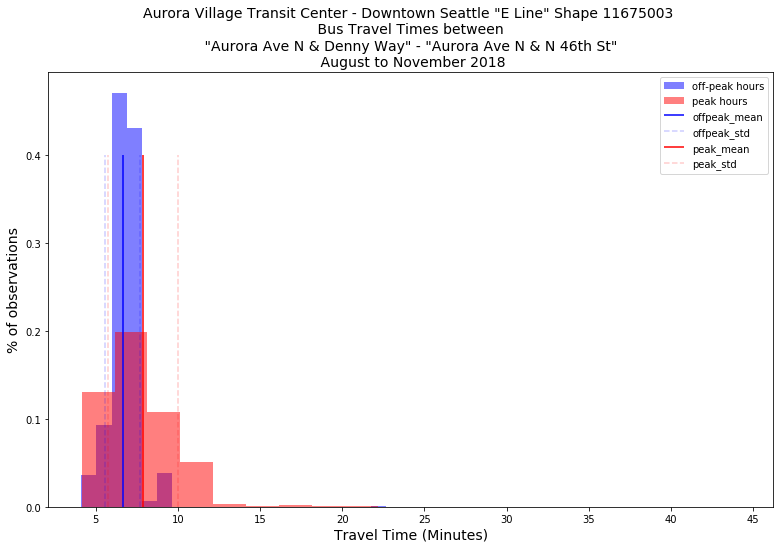

In [44]:
stop_1 = 'Aurora Ave N & Denny Way'
stop_2 = 'Aurora Ave N & N 46th St'
plot_histograms(peak_pivot_time_from_sched, offpeak_pivot_time_from_sched, 
                    input_dict['shape_id'], stop_1, stop_2,vline_ymax=0.4)